<img src="snake.webp" width=90%/>

# Snake Game

I asked 4o to create the snake game for me. Let's see how it runs.

----

In [ ]:
## First Variation

In [3]:
import os
import random
import time

WIDTH = 20
HEIGHT = 10
SLEEP_TIME = 0.2

snake = [[5, 5]]
direction = [0, 1]
food = [random.randint(1, HEIGHT - 2), random.randint(1, WIDTH - 2)]
score = 0

def clear():
    os.system('cls' if os.name == 'nt' else 'clear')

def draw():
    clear()
    for y in range(HEIGHT):
        row = ""
        for x in range(WIDTH):
            if [y, x] == food:
                row += "*"
            elif [y, x] in snake:
                row += "O"
            elif y == 0 or y == HEIGHT - 1 or x == 0 or x == WIDTH - 1:
                row += "#"
            else:
                row += " "
        print(row)
    print(f"Score: {score}")
    print("Move with W/A/S/D then press Enter (Q to quit):")

def move_snake():
    global food, score
    new_head = [snake[0][0] + direction[0], snake[0][1] + direction[1]]
    if (new_head in snake or
        new_head[0] == 0 or new_head[0] == HEIGHT - 1 or
        new_head[1] == 0 or new_head[1] == WIDTH - 1):
        return False
    snake.insert(0, new_head)
    if new_head == food:
        score += 1
        while True:
            food = [random.randint(1, HEIGHT - 2), random.randint(1, WIDTH - 2)]
            if food not in snake:
                break
    else:
        snake.pop()
    return True

# Main game loop
while True:
    draw()
    key = input().lower()
    if key == 'w' and direction != [1, 0]:
        direction = [-1, 0]
    elif key == 's' and direction != [-1, 0]:
        direction = [1, 0]
    elif key == 'a' and direction != [0, 1]:
        direction = [0, -1]
    elif key == 'd' and direction != [0, -1]:
        direction = [0, 1]
    elif key == 'q':
        print("Goodbye!")
        break
    if not move_snake():
        draw()
        print("Game Over!")
        break
    time.sleep(SLEEP_TIME)


####################
#                  #
#                  #
#  *               #
#                  #
#    O             #
#                  #
#                  #
#                  #
####################
Score: 0
Move with W/A/S/D then press Enter (Q to quit):


 A


####################
#                  #
#                  #
#  *               #
#                  #
#     O            #
#                  #
#                  #
#                  #
####################
Score: 0
Move with W/A/S/D then press Enter (Q to quit):


 A


####################
#                  #
#                  #
#  *               #
#                  #
#      O           #
#                  #
#                  #
#                  #
####################
Score: 0
Move with W/A/S/D then press Enter (Q to quit):


 A


####################
#                  #
#                  #
#  *               #
#                  #
#       O          #
#                  #
#                  #
#                  #
####################
Score: 0
Move with W/A/S/D then press Enter (Q to quit):


 Q


Goodbye!


I press A, but it moves the other way. Also, I don't like how it's printing like this, there's no colors or anything.

---

In [ ]:
## Second Variation 

In [7]:
# Run this simplified snake "simulator" in a Jupyter notebook

import random

width, height = 10, 10
snake = [[5, 5]]
direction = (0, 1)
food = [random.randint(1, height - 2), random.randint(1, width - 2)]

def draw():
    for y in range(height):
        row = ""
        for x in range(width):
            if [y, x] == food:
                row += "*"
            elif [y, x] in snake:
                row += "O"
            else:
                row += "."
        print(row)
    print()

def move():
    head = snake[0]
    new_head = [head[0] + direction[0], head[1] + direction[1]]

    if new_head == food:
        snake.insert(0, new_head)
        while True:
            new_food = [random.randint(1, height - 2), random.randint(1, width - 2)]
            if new_food not in snake:
                break
        return new_food, False
    elif new_head in snake or not (0 <= new_head[0] < height and 0 <= new_head[1] < width):
        return food, True
    else:
        snake.insert(0, new_head)
        snake.pop()
        return food, False

# Run interactively
while True:
    draw()
    move_input = input("Move (WASD or Q to quit): ").lower()
    if move_input == 'w':
        direction = (-1, 0)
    elif move_input == 's':
        direction = (1, 0)
    elif move_input == 'a':
        direction = (0, -1)
    elif move_input == 'd':
        direction = (0, 1)
    elif move_input == 'q':
        print("Thanks for playing!")
        break

    food, game_over = move()
    if game_over:
        draw()
        print("Game Over!")
        break


..........
..........
..........
........*.
..........
.....O....
..........
..........
..........
..........



Move (WASD or Q to quit):  d


..........
..........
..........
........*.
..........
......O...
..........
..........
..........
..........



Move (WASD or Q to quit):  d


..........
..........
..........
........*.
..........
.......O..
..........
..........
..........
..........



Move (WASD or Q to quit):  


..........
..........
..........
........*.
..........
........O.
..........
..........
..........
..........



Move (WASD or Q to quit):  Q


Thanks for playing!


Well, this is a better visual, but it's still not running like I really want it to.

----

## Third Variation

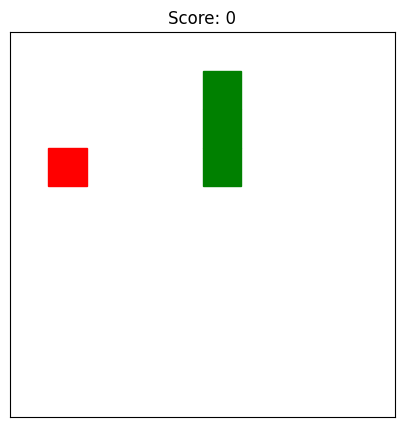

Move (W/A/S/D or Q to quit):  Q


Game quit.


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
import time

# Game settings
GRID_SIZE = 10
snake = [(5, 5), (5, 4), (5, 3)]
direction = (0, 1)  # Right
food = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
score = 0

def place_food():
    while True:
        new_food = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
        if new_food not in snake:
            return new_food

def draw_game():
    clear_output(wait=True)
    plt.figure(figsize=(5, 5))
    ax = plt.gca()
    ax.set_xlim(0, GRID_SIZE)
    ax.set_ylim(0, GRID_SIZE)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    # Draw snake
    for segment in snake:
        rect = plt.Rectangle(segment, 1, 1, color="green")
        ax.add_patch(rect)

    # Draw food
    rect = plt.Rectangle(food, 1, 1, color="red")
    ax.add_patch(rect)

    plt.title(f"Score: {score}")
    plt.show()

def move_snake(dir):
    global food, score
    head = snake[0]
    new_head = (head[0] + dir[0], head[1] + dir[1])

    # Check collision
    if (new_head in snake or
        not (0 <= new_head[0] < GRID_SIZE) or
        not (0 <= new_head[1] < GRID_SIZE)):
        return False

    snake.insert(0, new_head)

    if new_head == food:
        score += 1
        food = place_food()
    else:
        snake.pop()
    return True

# Game loop
while True:
    draw_game()
    move = input("Move (W/A/S/D or Q to quit): ").lower()
    if move == 'w' and direction != (1, 0):
        direction = (-1, 0)
    elif move == 's' and direction != (-1, 0):
        direction = (1, 0)
    elif move == 'a' and direction != (0, 1):
        direction = (0, -1)
    elif move == 'd' and direction != (0, -1):
        direction = (0, 1)
    elif move == 'q':
        print("Game quit.")
        break

    if not move_snake(direction):
        draw_game()
        print("Game Over!")
        break

    time.sleep(0.1)


You can't see this happening, but everytime I click "W" it's going the right way up! I think I'm satisfied.

---

## Conclusion

</br>

It only took a few more prompting techniques to get the snake game to work properly! It was able to do everything I asked, I only had to understand **how** to ask the right questions to get it working. In the end, it's because I had to figure out code that would run inside the Jupyter notebook cell and uses nothing in the backend. 